In [116]:
import decoupler as dc

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

In [136]:
msigdb = dc.get_resource('MSigDB')
msigdb.drop_duplicates(inplace=True)

In [119]:
#dc.show_resources()

In [120]:
# cancer_db = dc.get_resource(f'CancerGeneCensus', auto_dtype=False)

In [121]:
#cancer_genes = dc.get_resource('CancerGeneCensus')

In [122]:
#import rna seq
genes = pd.read_csv('tcga.brca.rnaseq.unstranded.fpkm.counts.matrix (1).txt', sep = '\t', index_col=0)
genes.shape

(1231, 60663)

In [123]:
BRCA_stat = pd.read_csv('toga.breast.brca.status.txt', sep = '\t', index_col=0)
#BRCA_stat
#genes

In [124]:
HRD_stat = pd.read_excel('tcga.hrdscore.xlsx')
HRD_stat

,sample,HRD,Telomeric AI,LST,HRD-sum
0,TCGA-02-0001,5,6,8,19
1,TCGA-02-0003,1,3,4,8
2,TCGA-02-0006,0,2,8,10
3,TCGA-02-0007,8,6,4,18
4,TCGA-02-0009,1,4,2,7
...,...,...,...,...,...
9599,TCGA-ZS-A9CE,4,5,6,15
9600,TCGA-ZS-A9CF-a,11,9,14,34
9601,TCGA-ZS-A9CG,1,5,0,6
9602,TCGA-ZU-A8S4-a,8,8,9,25


In [125]:
#mergeing BRCA status and RNA seq
BRCA_stat.index = BRCA_stat.index.str.replace('.', '-')

merged_df = pd.merge(genes,BRCA_stat, left_on='Case ID', right_on=BRCA_stat.index)

In [126]:
merged_df

,Case ID,Sample ID,Sample Type,ENSG00000000003.15|TSPAN6|protein_coding,ENSG00000000005.6|TNMD|protein_coding,ENSG00000000419.13|DPM1|protein_coding,ENSG00000000457.14|SCYL3|protein_coding,ENSG00000000460.17|C1orf112|protein_coding,ENSG00000000938.13|FGR|protein_coding,ENSG00000000971.16|CFH|protein_coding,...,H2.norm,H3.norm,H4.norm,event.BRCA1,event.BRCA2,event.RAD51C,event.PALB2,event.All Events,event.PAM50,event.TNBC
0,TCGA-E9-A1RH,TCGA-E9-A1RH-01A,Primary Tumor,1.0276,0.0000,74.2709,1.3816,1.6749,1.4166,5.2410,...,0.345888,0.428967,0.130027,0,0,0,0,0,Her2,TNBC
1,TCGA-C8-A26W,TCGA-C8-A26W-01A,Primary Tumor,13.2684,0.1250,37.9298,3.7360,3.1045,2.4799,7.4851,...,0.236488,0.181064,0.491342,0,0,0,0,0,LumB,0
2,TCGA-E9-A1RH,TCGA-E9-A1RH-11A,Solid Tissue Normal,12.8007,8.4777,21.6363,2.4554,0.5852,2.7533,27.4655,...,0.345888,0.428967,0.130027,0,0,0,0,0,Her2,TNBC
3,TCGA-AO-A0JJ,TCGA-AO-A0JJ-01A,Primary Tumor,14.8681,2.2172,27.8838,4.3170,1.7847,3.7167,9.6630,...,0.339994,0.660006,0.000000,0,0,0,0,0,LumA,0
4,TCGA-BH-A0HO,TCGA-BH-A0HO-01A,Primary Tumor,0.8430,0.0798,22.1105,3.9971,0.9805,2.4742,3.8185,...,0.543380,0.424991,0.000000,0,0,0,0,0,LumA,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097,TCGA-BH-A0AU,TCGA-BH-A0AU-01A,Primary Tumor,6.4837,0.7204,37.6328,4.3130,1.9342,1.6600,6.3929,...,0.112751,0.729936,0.157313,0,0,0,0,0,LumB,0
1098,TCGA-A8-A09G,TCGA-A8-A09G-01A,Primary Tumor,7.6167,0.3250,33.0678,6.5885,2.3227,1.8351,5.2748,...,0.047682,0.079287,0.861793,0,0,0,0,0,Her2,0
1099,TCGA-E2-A14X,TCGA-E2-A14X-01A,Primary Tumor,20.7009,0.1777,39.0361,6.4451,2.7007,2.9901,5.2498,...,0.101556,0.706516,0.110122,0,0,0,0,0,Basal,TNBC
1100,TCGA-HN-A2OB,TCGA-HN-A2OB-01A,Primary Tumor,20.2782,0.6577,18.8827,3.7280,1.0939,1.9115,4.1113,...,0.399357,0.123436,0.165696,0,0,0,0,0,LumA,0


In [127]:
#merging prev and HRD status
final_sample = pd.merge(merged_df, HRD_stat, left_on='Case ID', right_on='sample')
final_sample.shape

(929, 60701)

In [128]:
#drop 'event.RAD51C' and 'event.PALB2'
final_sample_pos = final_sample[final_sample['event.All Events'] == 'YES']

In [129]:
#filter out sample columns 
genes_filt = final_sample.loc[:, final_sample.columns.str.startswith('E')]

#extract protein coding column names to protein_cod
protein_cod = []
for col in genes_filt.columns:
    #print(col.split())
    if col.split('|')[2] == 'protein_coding':
        protein_cod.append(col)


In [130]:
len(protein_cod)

19962

In [131]:
#filter to only include protein coding cols in df
genes_prot = genes_filt[protein_cod]

In [132]:
genes_filt_mean = genes_prot.mean(axis = 0)
top_400 = genes_filt_mean.nlargest(400).index

top_genes = genes_filt[top_400]


In [143]:
#gene_list

In [144]:
gene_list = top_genes.columns.tolist()
gene_split = [gene.split('|')[1] for gene in gene_list]

In [145]:
#list of top 2% of protein coding genes across all three datasets
gene_split

['MT-CO3',
 'MT-CO2',
 'MT-CO1',
 'MT-ND4',
 'MT-ATP6',
 'MT-CYB',
 'MT-ND1',
 'MT-ND3',
 'MT-ND2',
 'TMSB10',
 'FTL',
 'MT-ND4L',
 'MT-ND6',
 'MT-ND5',
 'ACTG1',
 'RPS12',
 'ACTB',
 'MT-ATP8',
 'RPS18',
 'S100A11',
 'SCGB2A2',
 'RPS11',
 'RPL8',
 'COL1A1',
 'KRT19',
 'PIP',
 'RPS27',
 'SCGB1D2',
 'COL3A1',
 'XBP1',
 'TMSB4X',
 'HSP90AB1',
 'EEF2',
 'RPS6',
 'HLA-DRA',
 'RPS4X',
 'SPARC',
 'PSAP',
 'GAPDH',
 'CRABP2',
 'MGP',
 'EEF1A1',
 'RPL7A',
 'HLA-B',
 'COL1A2',
 'IFI6',
 'RPL13A',
 'RPL3',
 'HLA-C',
 'AZGP1',
 'RPS2',
 'TFF1',
 'B2M',
 'S100A6',
 'CD74',
 'RPL10A',
 'IFITM3',
 'RPLP1',
 'RPLP2',
 'CD24',
 'RPL19',
 'RPLP0',
 'SLC39A6',
 'HSPB1',
 'TAGLN2',
 'RPS8',
 'IGFBP4',
 'HSP90AA1',
 'RPS21',
 'HLA-DRB1',
 'BGN',
 'LGALS1',
 'HLA-A',
 'S100A9',
 'RPL7',
 'CALR',
 'PPDPF',
 'LAPTM4A',
 'RPL12',
 'FN1',
 'RPS25',
 'RPL11',
 'MAGED2',
 'LUM',
 'APOD',
 'HSPA8',
 'CPB1',
 'SLC25A6',
 'MARCKSL1',
 'RPL29',
 'ATP5F1B',
 'IGFBP5',
 'SFRP2',
 'MYL12B',
 'PEBP1',
 'LTF',
 'RPL27',
 

In [146]:
ORA_df = dc.get_ora_df(
    df = gene_split,
    net = msigdb,
    source='geneset',
    target='genesymbol',
    verbose=True,
)

Running ora on df with 400 targets for 33552 sources with 20000 background features.


In [149]:
ORA_df['-log 10 p-value'] = np.log10(ORA_df['p-value'])*-1
test_pval_filt = ORA_df[ORA_df['p-value'] < 0.05]

test_pval_filt = test_pval_filt.sort_values(by=['-log 10 p-value'])
test_pval_filt.tail(10)

,Term,Set size,Overlap ratio,p-value,FDR p-value,Odds ratio,Combined score,Features,-log 10 p-value
18697,MORF_NPM1,162,0.574074,2.341832e-117,5.220647e-114,37.121196,9968.953625,ACTB;ACTG1;ANP32B;BTF3;CCNI;CFL1;CLIC1;COX7C;E...,116.630444
686,BUSSLINGER_DUODENAL_TRANSIT_AMPLIFYING_CELLS,193,0.518135,3.304037e-120,8.184099e-117,34.234996,9418.563175,ACTG1;AGR2;ANP32B;ARL6IP1;ATP5F1B;ATP5F1C;CANX...,119.480955
18635,MORF_ACTG1,138,0.659420,4.340702e-123,1.209591e-119,42.397923,11945.611735,ACTB;ACTG1;B2M;BTF3;CALM2;CFL1;CLIC1;COX7C;COX...,122.362440
677,BUSSLINGER_DUODENAL_DIFFERENTIATING_STEM_CELLS,298,0.402685,2.717509e-128,8.654491e-125,28.355100,8328.776848,ACTG1;AGR2;ANP32B;APEX1;APP;ARL6IP1;ATP5F1B;BA...,127.565829
16091,LAKE_ADULT_KIDNEY_C19_COLLECTING_DUCT_INTERCAL...,321,0.398754,1.044092e-136,3.879325e-133,28.864877,9037.836017,ACTG1;ACTR2;APLP2;APP;ARF1;ATP5F1B;ATP5F1C;ATP...,135.981261
16107,LAKE_ADULT_KIDNEY_C9_THIN_ASCENDING_LIMB,268,0.458955,1.405643e-140,6.267200e-137,32.707081,10532.380732,ACTG1;ANXA5;APLP2;APP;ARF1;ATP5F1B;ATP5F1C;ATP...,139.852125
16085,LAKE_ADULT_KIDNEY_C10_THIN_ASCENDING_LIMB,347,0.391931,1.362259e-144,7.592209e-141,29.187175,9668.634498,ACTG1;ACTR2;ANXA5;APLP2;APP;ARF1;ATP5F1B;ATP5F...,143.865740
16090,LAKE_ADULT_KIDNEY_C18_COLLECTING_DUCT_PRINCIPA...,319,0.423197,4.505264e-149,3.347862e-145,31.438521,10738.767755,ACTG1;ACTR2;APLP2;ARF1;ATP5F1B;ATP5F1C;ATP6V0E...,148.346280
16106,LAKE_ADULT_KIDNEY_C8_DECENDING_THIN_LIMB,275,0.469091,1.850005e-149,2.062109e-145,34.151230,11695.771454,ACTG1;ANXA5;APLP2;ARF1;B2M;BTF3;CANX;CCNI;CD24...,148.732827
15604,HSIAO_HOUSEKEEPING_GENES,394,0.421320,4.911328e-186,1.094882e-181,35.287790,15056.921696,ACTB;ACTG1;ANP32B;APEX1;APLP2;ARF1;ARF4;ARHGDI...,185.308801


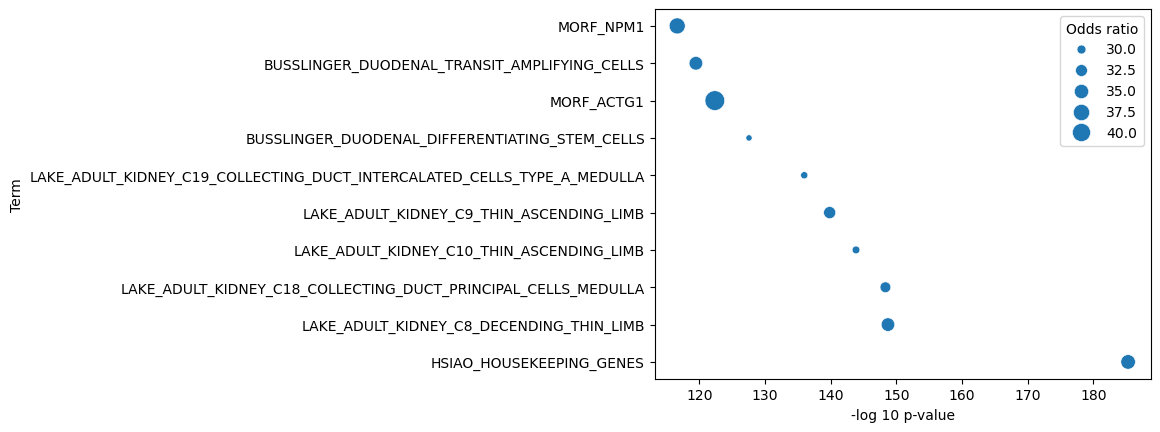

In [150]:
plot = sns.scatterplot(
    data=test_pval_filt.tail(10), x="-log 10 p-value", y="Term",  size="Odds ratio",
    sizes=(20, 200)
)